In [1]:
from pyfmi import load_fmu

In [2]:
#bouncing_fmu = load_fmu('BouncingBallTest.fmu')
lorenz_fmuX = load_fmu('LorenzX.fmu')
lorenz_fmuY = load_fmu('LorenzY.fmu')
lorenz_fmuZ = load_fmu('LorenzZ.fmu')

In [3]:
#bouncing_fmu.initialize()
lorenz_fmuX.initialize()
lorenz_fmuY.initialize()
lorenz_fmuZ.initialize()

In [4]:
vref_x = [lorenz_fmuX.get_variable_valueref('x')]+[lorenz_fmuX.get_variable_valueref('y')]
vref_y = [lorenz_fmuY.get_variable_valueref('x')]+[lorenz_fmuY.get_variable_valueref('y')]+[lorenz_fmuY.get_variable_valueref('z')]
vref_z = [lorenz_fmuZ.get_variable_valueref('x')]+[lorenz_fmuZ.get_variable_valueref('y')]+[lorenz_fmuZ.get_variable_valueref('z')]

In [5]:
vref_y

[2, 3, 4]

In [6]:
print(lorenz_fmuX.get_real(vref_x))
print(lorenz_fmuY.get_real(vref_y))
print(lorenz_fmuZ.get_real(vref_z))

[1. 1.]
[1. 1. 1.]
[1. 1. 1.]


In [7]:
dx = lorenz_fmuX.get_derivatives()
dy = lorenz_fmuY.get_derivatives()
dz = lorenz_fmuZ.get_derivatives()

In [8]:
print(dx,' ',dy,' ',dz)

[0.]   [26.]   [-1.66666667]


In [9]:
lorenz_fmuX.continuous_states+dx

array([1.])

# --- General Idea ----- #
t = 1
   LORENZX: 
        x = 1
        y = 1
        der(x) = 0
   LORENZY: 
        x = 1
        y = 1
        z = 1
        der(y) = 26
   LORENZZ: 
        x = 1
        y = 1
        z = 1
        der(z) = -1.6
t = 2
   LORENZX:
        x = 1+0 = 1
        y =  27
        derx = 10*(27-1) = 260
   LORENZY:
        x = 1
        y = 1+26 = 27
        z = -0.6
   LORENZZ:  
        x = 1 
        y = 27
        z = -0.6

In [10]:
lorenz_fmuX.continuous_states = lorenz_fmuX.continuous_states + dx    
lorenz_fmuY.continuous_states = lorenz_fmuY.continuous_states + dy
lorenz_fmuZ.continuous_states = lorenz_fmuZ.continuous_states + dz

In [11]:
lorenz_fmuX.continuous_states

array([1.])

In [12]:
lorenz_fmuX.set_real(vref_x[1],lorenz_fmuY.get_real(vref_y[1])) #y
#--------------------------------------------------------------#
lorenz_fmuY.set_real(vref_y[0],lorenz_fmuX.get_real(vref_x[0]))  #x
lorenz_fmuY.set_real(vref_y[2],lorenz_fmuZ.get_real(vref_z[2]))  #z
#--------------------------------------------------------------#
lorenz_fmuZ.set_real(vref_z[1],lorenz_fmuY.get_real(vref_y[1]))  #y
lorenz_fmuZ.set_real(vref_z[0],lorenz_fmuX.get_real(vref_x[0]))  #x

In [13]:
print(lorenz_fmuX.get_real(vref_x))
print(lorenz_fmuY.get_real(vref_y))
print(lorenz_fmuZ.get_real(vref_z))

[ 1. 27.]
[ 1.         27.         -0.66666667]
[ 1.         27.         -0.66666667]


# ---------------------CheckPoint--------------------- #

In [4]:
timeStart = 0
timeEnd = 50
dt = 0.01
time = timeStart

vref_x = [lorenz_fmuX.get_variable_valueref('x')]+[lorenz_fmuX.get_variable_valueref('y')]
vref_y = [lorenz_fmuY.get_variable_valueref('x')]+[lorenz_fmuY.get_variable_valueref('y')]+[lorenz_fmuY.get_variable_valueref('z')]
vref_z = [lorenz_fmuZ.get_variable_valueref('x')]+[lorenz_fmuZ.get_variable_valueref('y')]+[lorenz_fmuZ.get_variable_valueref('z')]

lorenz_fmuX.time = timeStart
lorenz_fmuY.time = timeStart
lorenz_fmuZ.time = timeStart

t_time = []
t_sol =  {'X':[],'Y':[],'Z':[]}

x = lorenz_fmuX.continuous_states
y = lorenz_fmuY.continuous_states
z = lorenz_fmuZ.continuous_states

In [7]:
import numpy as np

In [8]:
while time < timeEnd:
    dx = lorenz_fmuX.get_derivatives()
    dy = lorenz_fmuY.get_derivatives()
    dz = lorenz_fmuZ.get_derivatives()
    
    time = time + dt
    
    lorenz_fmuX.time = time
    lorenz_fmuY.time = time
    lorenz_fmuZ.time = time
    
    x = x + dt*dx
    y = y + dt*dy
    z = z + dt*dz
    
    lorenz_fmuX.continuous_states = x
    lorenz_fmuY.continuous_states = y
    lorenz_fmuZ.continuous_states = z
    
    lorenz_fmuX.set_real(vref_x[1],lorenz_fmuY.continuous_states)
    
    lorenz_fmuY.set_real(vref_y[0],lorenz_fmuX.continuous_states)
    lorenz_fmuY.set_real(vref_y[2],lorenz_fmuZ.continuous_states)
    
    lorenz_fmuZ.set_real(vref_z[0],lorenz_fmuX.continuous_states)
    lorenz_fmuZ.set_real(vref_z[1],lorenz_fmuY.continuous_states)
    
    t_time.append(round(time,2))
    
    t_sol['X'].append(lorenz_fmuX.get_real(vref_x).tolist())
    t_sol['Y'].append(lorenz_fmuY.get_real(vref_y).tolist())
    t_sol['Z'].append(lorenz_fmuZ.get_real(vref_z).tolist())
    

In [9]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

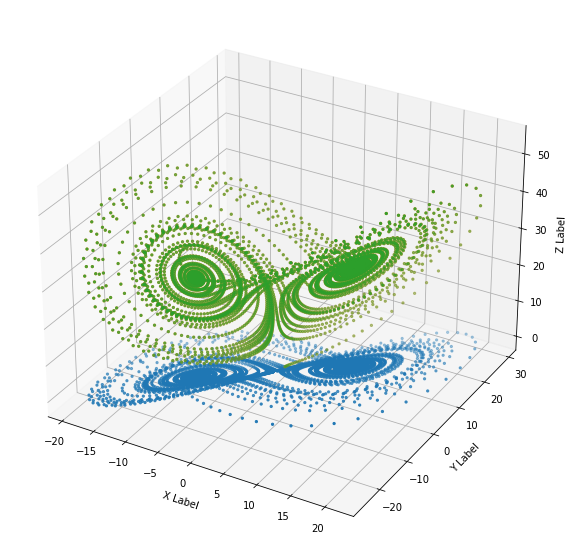

In [14]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

Models = ['X','Y','Z']
Shapes = ['o','^','>']

Sol_X = np.array(t_sol['X'])
Sol_Y = np.array(t_sol['Y'])
Sol_Z = np.array(t_sol['Z'])

ax.scatter(Sol_X[:,0],Sol_X[:,1],marker='.')
ax.scatter(Sol_Y[:,0],Sol_Y[:,1],Sol_Y[:,2],marker='.')
ax.scatter(Sol_Z[:,0],Sol_Z[:,1],Sol_Z[:,2],marker='.')
   
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.rcParams['figure.figsize'] = [16,12]
plt.show()

In [16]:
import pickle

In [51]:
t_time = np.round(t_time,2)
Sol_X = np.round(Sol_X,2)
Sol_Y = np.round(Sol_Y,2)
Sol_Z = np.round(Sol_Z,2)

In [52]:
with open('result.txt','w') as fileWriter:
    fileWriter.write('time\t\t,LorenzX\t\t,LorenzY\t\t,LorenzZ\t\t')
    #fileWriter.writelines('\n'+str(i) for i in t_time)
    fileWriter.writelines(('\n'+str(time)+'\t,\t'+str(i)+'\t,\t'+str(j)+'\t,\t'+str(k) for time,i,j,k in zip(t_time,Sol_X,Sol_Y,Sol_Z)))